# Carregar dados

In [2]:
import pandas as pd

# # Mostrar mais colunas
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)
pd.set_option('display.max_colwidth', 100)

df = pd.read_parquet("./output/gold/rais_TODOS_ANOS_comJoin_RAIS_VINC_PUB.parquet.gzip")

qnt_full = len(df)
print(f"""
Quantidade docs: {qnt_full}
""")

df.head(2)



Quantidade docs: 3034686



,ano,sigla_uf_id,regiao,regiao_id,sigla_uf,remuneracao_media,desligamento,idade,ocupacao_id,ocupacao,sexo_id,sexo,sigla_municipio
0,2015,0,Norte,2,AC,851.02,0,25,317205,Operador de Computador (Inclusive Microcomputador),1,Masculino,Rio Branco
1,2015,0,Norte,2,AC,882.55,0,21,317205,Operador de Computador (Inclusive Microcomputador),1,Masculino,Cruzeiro do Sul


In [3]:
# df = df[df["remuneracao_media"] > 0]


df.to_csv("./output/gold/rais_TODOS_ANOS_comJoin_RAIS_VINC_PUB.parquet.csv", index=False, decimal=",")

In [8]:
# get the mean of "remuneracao_media" from sexo = Masculino
df[df["sexo"] == "Masculino"]["remuneracao_media"].mean()

5345.804899356411

# Correlação

C:\Users\marce\AppData\Local\Temp\ipykernel_3768\3679701469.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=1, annot=True, linewidths=.5)


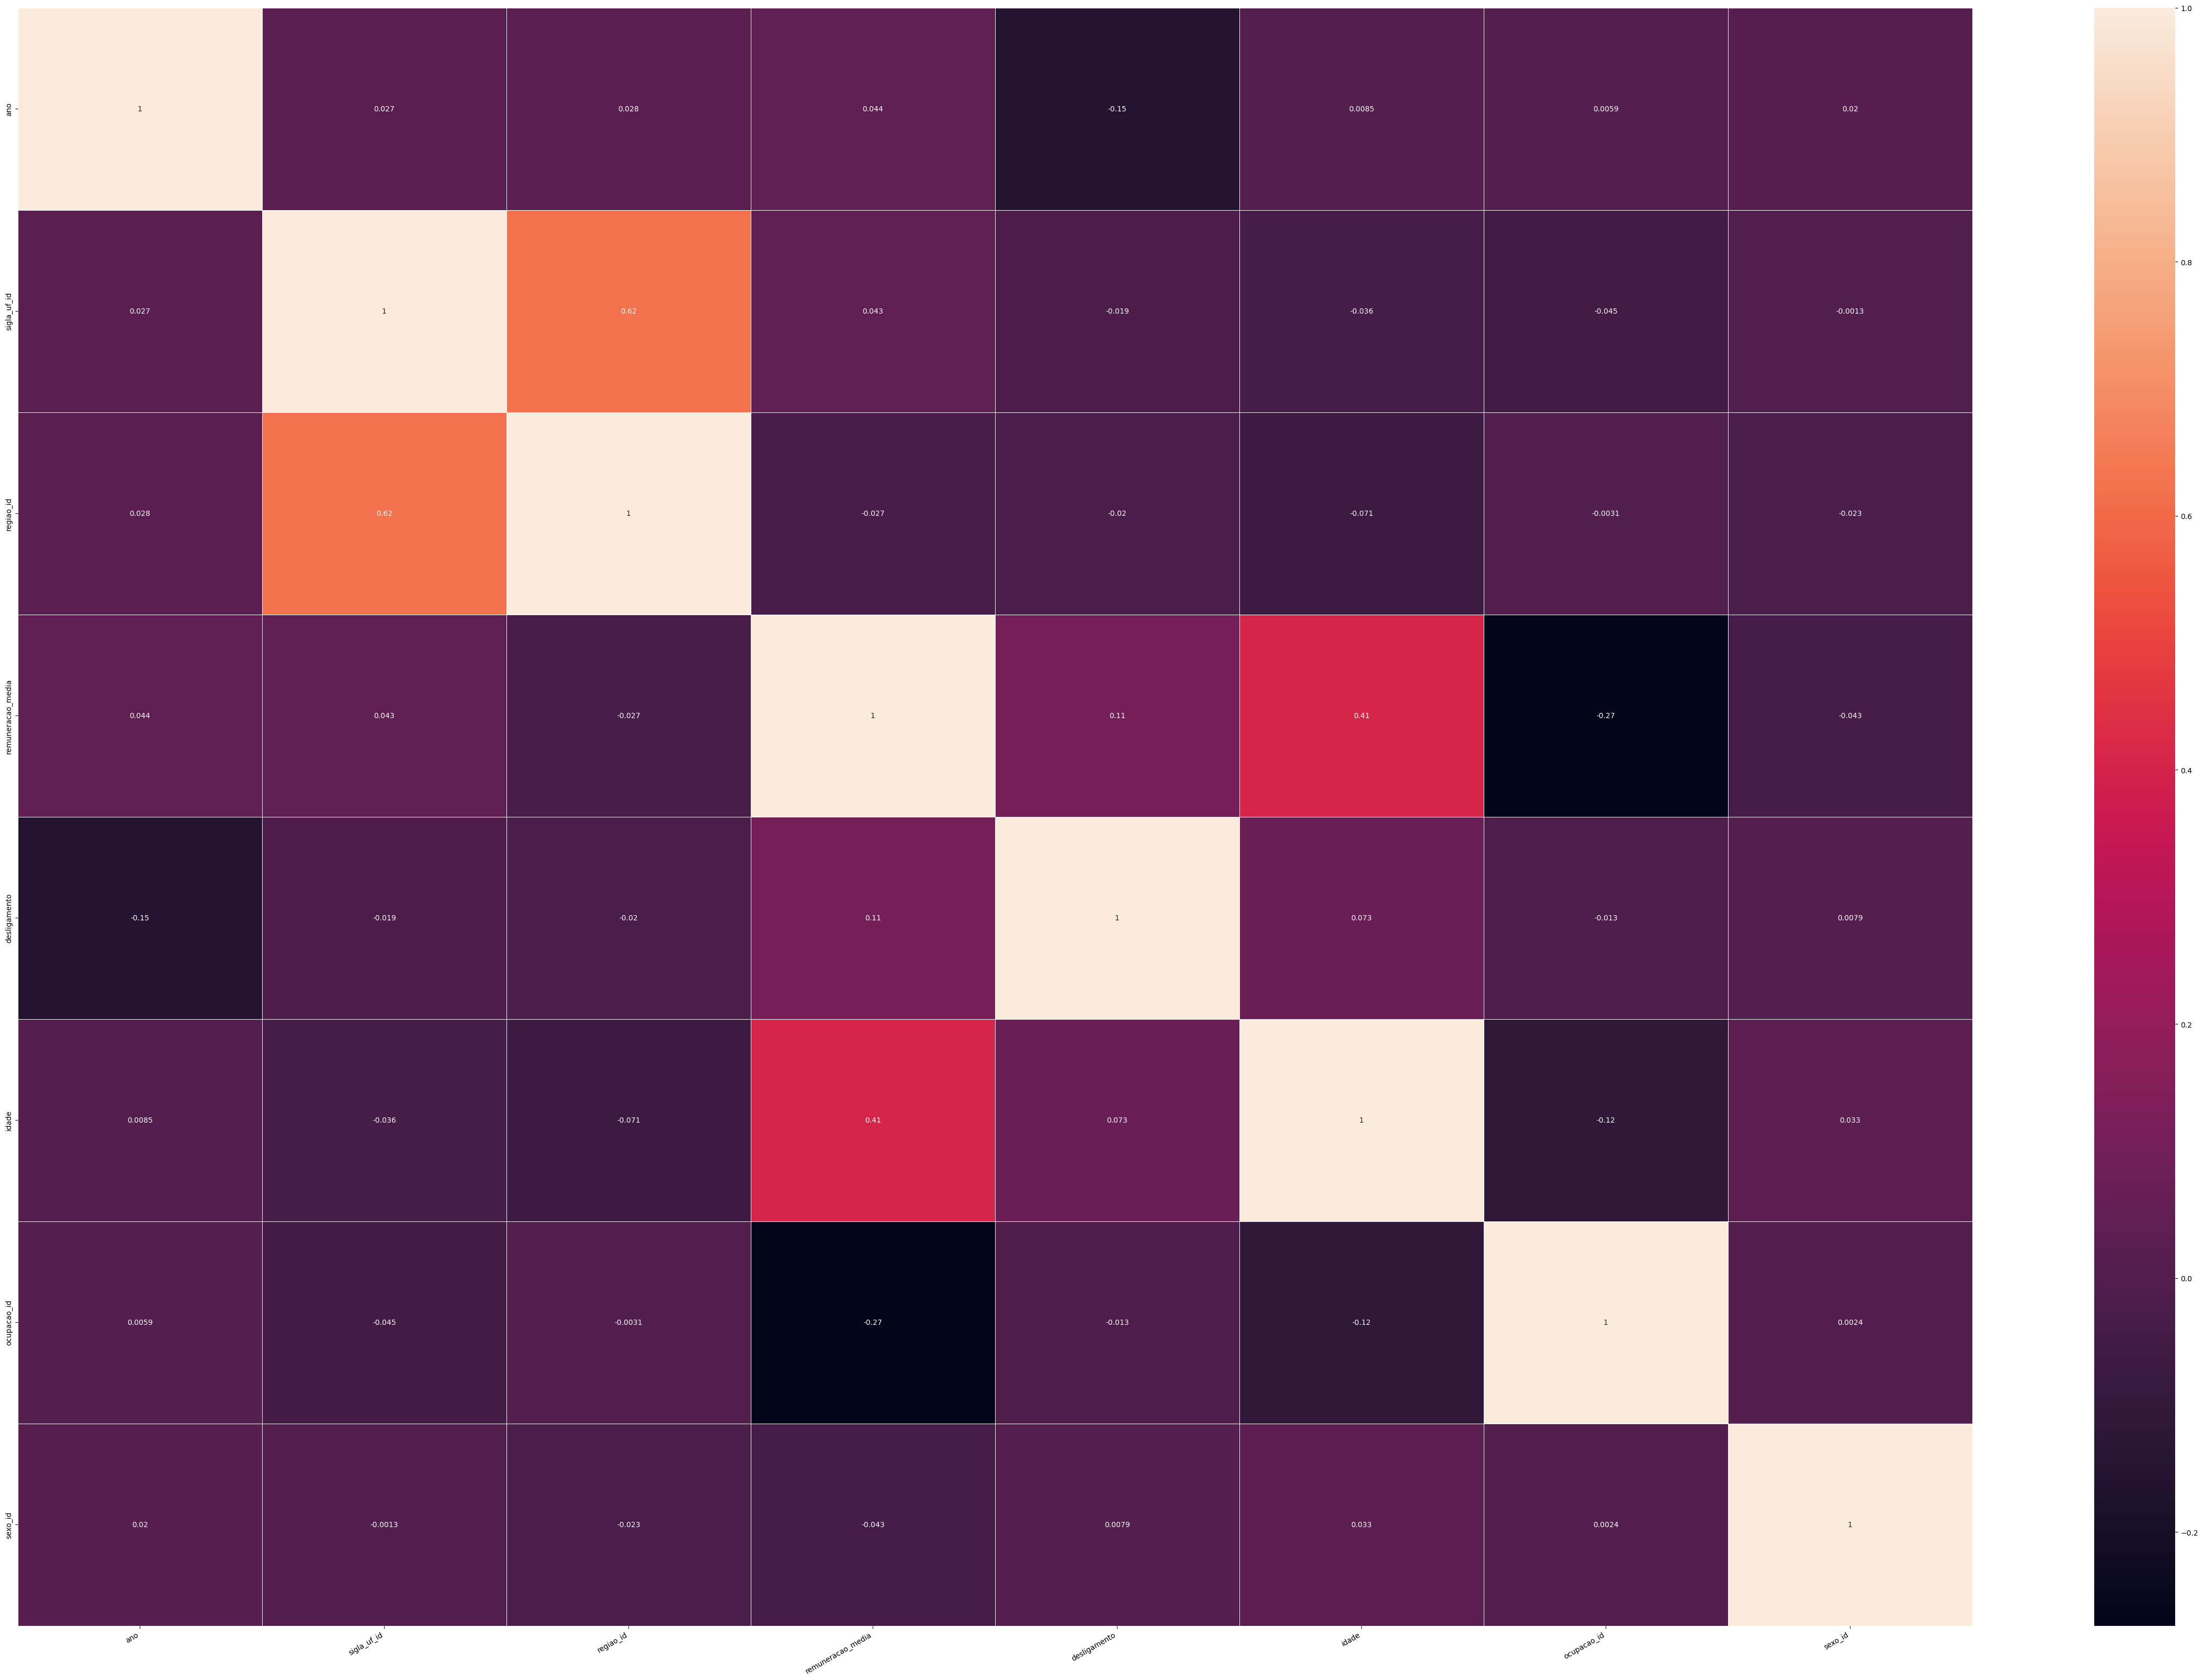

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 40))
sns.heatmap(df.corr(), vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment="right")
plt.show()


In [ ]:
df["Tipo Salário"].value_counts()